# Week 2
__Dates__: March 6-13, 2018

__Authors__: Alex Nakagawa and Jemima Shi

This week, we tried tackling the alignment of all of the sequences 

In [358]:
import numpy as np
import pandas as pd
import re
import Bio
from Bio import SeqIO
from glob import glob
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

DATA_DIR = '../data/raw/3.24_species_only/' # Just the 24 species only

In [7]:
#Reads through and saves the names of all files found in the same directory.

files = glob(DATA_DIR + '*.fa')
files[:5]

In [8]:

def read_file(file_name):
    """
    file_name: the name of a file within the directory
    
    Returns all the records from a single fasta file as a list.
    """
    records = []
    for record in SeqIO.parse(file_name, "fasta"):
        records.append(record)
    return records

records = read_file(files[0])

In [9]:

def C_count(sequence):
    """
    sequence: a sequence of A, C, T, G as a string
    
    Returns the number of "C's" within the sequence
    """
    return len(re.findall(r"C", str(sequence)))


def G_count(sequence):
    """
    sequence: a sequence of A, C, T, G as a string
    
    Returns the number of "G's" within the sequence
    """
    return len(re.findall(r"G", str(sequence)))

In [323]:
def extract(records):
    """
    records: the raw data from 1 specific fasta file
    
    Returns the namem sequence, C/G counts and ratio, and sequence length of data extracted into a pandas df.
    """
    values = [[record.seq, record.description] for record in records]
    sequences = pd.DataFrame(values)
    sequences.rename(columns={0 : 'Sequence', 1: 'Description'}, inplace=True)
    sequences.set_index('Description', inplace=True)
    
    sequences["C Count"] = sequences["Sequence"].apply(lambda x: C_count(x))
    sequences["G Count"] = sequences["Sequence"].apply(lambda x: G_count(x))
    sequences["Length"] = sequences["Sequence"].apply(lambda x: len(x))

    sequences["CG Ratio"] = (sequences["C Count"] + sequences["G Count"]) / sequences["Length"]
    return sequences

In [324]:
extract(records)

Sequence  \
Description                                                                   
VT0809|1|dkik|-|2537      (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB002A|-|2381  (C, G, C, A, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB002B|-|1369  (T, T, T, C, A, A, C, C, C, A, A, T, T, T, C, ...   
VT0809|1|MEMB002C|-|2410  (C, G, C, A, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB003A|-|1373  (T, T, T, C, A, A, C, C, C, A, A, T, T, T, C, ...   
VT0809|1|MEMB003D|-|2451  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB003F|-|1439  (T, T, T, C, A, A, C, C, C, A, A, T, T, T, C, ...   
VT0809|1|MEMB004A|-|2425  (C, G, C, A, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB005D|-|2314  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB006A|-|2603  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB007B|-|2240  (C, T, G, C, G, T, G, C, C, A, C, A, G, A, A, ...   
VT0809|1|MEMB007C|-|2433  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB008C|-|2691  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB002D|+|2550  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB002E|+|2723  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB002F|+|2568  (C, G, C, A, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB003B|+|2565  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB003C|+|2403  (C, G, C, A, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB004B|+|2568  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB004E|+|2468  (A, G, G, C, C, T, C, C, T, C, T, G, A, C, T, ...   
VT0809|1|MEMB005B|+|2600  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB006B|+|2534  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB006C|+|2652  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   
VT0809|1|MEMB007D|+|2525  (C, G, C, T, A, C, A, T, C, A, G, C, C, A, A, ...   

                          C Count  G Count  Length  CG Ratio  
Description                                                   
VT0809|1|dkik|-|2537          564      491    2537  0.415845  
VT0809|1|MEMB002A|-|2381      557      481    2381  0.435951  
VT0809|1|MEMB002B|-|1369      292      266    1369  0.407597  
VT0809|1|MEMB002C|-|2410      573      474    2410  0.434440  
VT0809|1|MEMB003A|-|1373      350      270    1373  0.451566  
VT0809|1|MEMB003D|-|2451      543      464    2451  0.410853  
VT0809|1|MEMB003F|-|1439      338      279    1439  0.428770  
VT0809|1|MEMB004A|-|2425      556      460    2425  0.418969  
VT0809|1|MEMB005D|-|2314      498      422    2314  0.397580  
VT0809|1|MEMB006A|-|2603      567      463    2603  0.395697  
VT0809|1|MEMB007B|-|2240      511      438    2240  0.423661  
VT0809|1|MEMB007C|-|2433      554      438    2433  0.407727  
VT0809|1|MEMB008C|-|2691      542      470    2691  0.376068  
VT0809|1|MEMB002D|+|2550      577      494    2550  0.420000  
VT0809|1|MEMB002E|+|2723      541      501    2723  0.382666  
VT0809|1|MEMB002F|+|2568      615      506    2568  0.436526  
VT0809|1|MEMB003B|+|2565      526      452    2565  0.381287  
VT0809|1|MEMB003C|+|2403      559      475    2403  0.430295  
VT0809|1|MEMB004B|+|2568      546      474    2568  0.397196  
VT0809|1|MEMB004E|+|2468      511      436    2468  0.383712  
VT0809|1|MEMB005B|+|2600      583      490    2600  0.412692  
VT0809|1|MEMB006B|+|2534      544      470    2534  0.400158  
VT0809|1|MEMB006C|+|2652      524      465    2652  0.372926  
VT0809|1|MEMB007D|+|2525      547      459    2525  0.398416

In [11]:

def matches(sequence1, sequence2):
    """
    sequence1: the sequence of the species chosen 
    sequence2: a sequence of another species within the table
    
    Returns a string with the first sequence, second sequence, matching symbol '-', and final matched score.
    """
    alignments = pairwise2.align.globalxx(str(sequence1), str(sequence2))
    x = format_alignment(*alignments[0])
    return x


In [12]:

def take_first_sequence(matched_sequence):
    """
    matched_sequence: the output from the matches fn
    
    Returns the first sequence outputted from matches that has now been matched with another sequence.
    """
    splits = re.split(r'\s+', matched_sequence)
    return list(splits[0])

In [13]:

def take_second_sequence(matched_sequence):
    """
    matched_sequence: the output from the matches fn
    
    Returns the second sequence outputted from matches that has now been matched with a base sequence.
    """
    splits = re.split(r'\s+', matched_sequence)
    return list(splits[2])

In [281]:

def chosen_base_sequence(base_sequence_index, table):
    """
    base_sequence_index: the index of a species to compare with others in the table
    table: the df holding the sequences of the chosen species and others of the same file
    
    Returns a df with the rows indicating the 'base_index'_'index in comparison' while columns 
    indicate the index of a genome within the sequence and a column with the matching score from pairwise2.
    
    """
    other_sequences = list(np.arange(table.shape[0]))
    temp = matches(table["Sequence"][base_sequence_index], table["Sequence"][other_sequences[0]])
    first_comparison = take_first_sequence(temp)
    
    scores = []
    
    final = pd.DataFrame(take_second_sequence(temp)).reset_index()
    final = final.rename(columns={0: "{}_{}".format(base_sequence_index, other_sequences[0])})
    
    if base_sequence_index == 0:
        scores += [table["Length"][0]]   
    else:
        scores = scores + re.findall(r'[0-9]+', temp)
    
    base = str(table.iloc[base_sequence_index, 0])
    for x in other_sequences[1:]:
        matched = matches(base, str(table.iloc[x, 0]))
        to_add = pd.DataFrame(take_second_sequence(matched))
        scores = scores + re.findall(r'[0-9]+', matched)
        final = final.merge(to_add.reset_index(), on= "index", how= 'outer')
        final = final.rename(columns={0: "{}_{}".format(base_sequence_index, x)})
        
    final.drop("index", 1, inplace=True)
    final_transpose = final.transpose()
    final_transpose["Score"] = scores
    return final_transpose

In [ ]:
#VERSION WITH JUST NAME

# def rename(matched_table, table, sequence_index):
#     """
#     matched_table: the df with the matched sequences.
#     table: the df that holds all the species extracted from the raw data
#     sequence_index: the index of the specimen of interest
    
#     Returns the df with all the possible combinations for the chosen species with others in the same file as the index
#     instead of the indicies.
#     """
#     reset = table.reset_index()
#     current_species = str(reset["Description"][sequence_index])
#     current_species = re.split(r'\|', current_species)[2]

#     current = [current_species]*sequences.shape[0]
#     other_species = [re.split(r'\|', i)[2] for i in reset["Description"]]
    
#     new_names = ["{} with {}".format(name1, name2) for name1, name2 in zip(current, other_species)]
#     temp = matched_table.reset_index()
#     temp["index"] = new_names
#     return temp

In [339]:
def rename(matched_table, table, sequence_index):
    """
    matched_table: the df with the matched sequences.
    table: the df that holds all the species extracted from the raw data
    sequence_index: the index of the specimen of interest
    
    Returns the df with all the possible combinations for the chosen species with others in the same file as the index
    instead of the indicies.
    """
    reset = table.reset_index()
    current_species = str(reset["Description"][sequence_index])
    current = [current_species]*sequences.shape[0]
    other_species = reset["Description"]
    new_names = ["{} with {}".format(name1, name2) for name1, name2 in zip(current, other_species)]
    temp = matched_table.reset_index()
    temp["index"] = new_names
    return temp

In [282]:
x = chosen_base_sequence(0, sequences)

In [291]:
x

0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  \
0_0   C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_1   C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A   
0_2   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_3   C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A   
0_4   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_5   C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_6   -  -  -  T  -  -  -  T  T  C  A  -  A  C  C  -  -  -  C  -  -  -  A  A   
0_7   C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A   
0_8   C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_9   C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_10  -  -  -  -  -  C  -  T  -  -  -  -  -  -  -  G  C  -  -  -  -  -  G  -   
0_11  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_12  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_13  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_14  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_15  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A   
0_16  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_17  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A   
0_18  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_19  -  -  -  -  -  -  -  -  -  A  G  -  -  -  -  G  C  -  -  -  -  -  -  C   
0_20  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_21  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_22  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   
0_23  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C   

     24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47  \
0_0   T  C  A  G  C  C  c  c  a  t  c  g  c  a  c  a  c  c  a  a  c  c  a  a   
0_1   G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_2   T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_3   G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_4   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_5   T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -  c  -  c  a  -   
0_6   -  -  T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_7   G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_8   T  C  A  G  C  C  C  C  A  T  C  G  C  c  c  a  t  c  -  c  a  -  a  c   
0_9   T  C  A  G  C  C  C  C  A  T  C  G  C  c  c  a  t  c  -  c  a  a  c  c   
0_10  T  -  -  G  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_11  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -  c  -  c  a  -   
0_12  T  C  A  -  T  C  C  C  C  A  A  C  G  C  a  c  c  a  t  c  -  c  a  -   
0_13  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -  c  -  c  a  -   
0_14  T  C  A  G  C  C  -  C  C  A  T  C  G  C  A  c  a  t  -  -  c  a  -  a   
0_15  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_16  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_17  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_18  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_19  T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
0_20  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -  c  -  c  a  -   
0_21  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -  c  -  c  a  -   
0_22  T  C  A  G  C  C  c  c  a  -  a  c  g  c  a  c  c  a  t  c  c  a  a  c   
0_23  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   

    

In [341]:
#changed the index from [base_index to current_index] to descriptions of the species 
#CHANGE TO SPECIES NAME LATER-- EVENTUALLY--
#sequences.reset_index()['Description'].str.findall('MEMB(....)')

pd.set_option('display.max_columns', 3160)

rename(x,sequences, 0)

index  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  \
0       dkik with dkik  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
1   dkik with MEMB002A  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C   
2   dkik with MEMB002B  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
3   dkik with MEMB002C  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C   
4   dkik with MEMB003A  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
5   dkik with MEMB003D  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
6   dkik with MEMB003F  -  -  -  T  -  -  -  T  T  C  A  -  A  C  C  -  -  -   
7   dkik with MEMB004A  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C   
8   dkik with MEMB005D  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
9   dkik with MEMB006A  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
10  dkik with MEMB007B  -  -  -  -  -  C  -  T  -  -  -  -  -  -  -  G  C  -   
11  dkik with MEMB007C  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
12  dkik with MEMB008C  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
13  dkik with MEMB002D  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
14  dkik with MEMB002E  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
15  dkik with MEMB002F  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C   
16  dkik with MEMB003B  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
17  dkik with MEMB003C  C  G  C  -  A  A  C  A  T  C  A  G  C  C  A  A  G  C   
18  dkik with MEMB004B  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
19  dkik with MEMB004E  -  -  -  -  -  -  -  -  -  A  G  -  -  -  -  G  C  -   
20  dkik with MEMB005B  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
21  dkik with MEMB006B  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
22  dkik with MEMB006C  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   
23  dkik with MEMB007D  C  G  C  T  A  C  A  T  C  A  G  C  C  A  A  G  C  A   

   18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  \
0   G  A  A  A  G  C  T  C  A  G  C  C  c  c  a  t  c  g  c  a  c  a  c  c  a   
1   A  -  T  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -   
2   -  -  -  -  -  -  T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
3   A  -  T  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -   
4   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
5   G  A  A  A  G  C  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -   
6   C  -  -  -  A  A  -  -  T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
7   A  -  T  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -   
8   G  A  A  A  G  C  T  C  A  G  C  C  C  C  A  T  C  G  C  c  c  a  t  c  -   
9   G  A  A  A  G  C  T  C  A  G  C  C  C  C  A  T  C  G  C  c  c  a  t  c  -   
10  -  -  -  -  G  -  T  -  -  G  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
11  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -   
12  G  A  A  A  G  C  T  C  A  -  T  C  C  C  C  A  A  C  G  C  a  c  c  a  t   
13  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -   
14  G  A  A  A  G  C  T  C  A  G  C  C  -  C  C  A  T  C  G  C  A  c  a  t  -   
15  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -   
16  G  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -   
17  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -   
18  G  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  -  -  -   
19  -  -  -  -  -  C  T  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
20  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -   
21  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C  C  A  T  C  G  C  A  C  a  -   
22  G  A  A  A  G  C  T  C  A  G  C  C  c  c  a  -  a  c  g  c  a  c  c  a  t   
23  G  A  A  A  G  C  T  C  A  G  C  C  -  -  -  -  -  -  -  -  -  -  - 

In [340]:
temps

index  0  1  2  3  4  5  6  7  \
0      VT0809|1|dkik|-|2537 with VT0809|1|dkik|-|2537  C  G  C  T  A  C  A  T   
1   VT0809|1|dkik|-|2537 with VT0809|1|MEMB002A|-|...  C  G  C  -  A  A  C  A   
2   VT0809|1|dkik|-|2537 with VT0809|1|MEMB002B|-|...  -  -  -  -  -  -  -  -   
3   VT0809|1|dkik|-|2537 with VT0809|1|MEMB002C|-|...  C  G  C  -  A  A  C  A   
4   VT0809|1|dkik|-|2537 with VT0809|1|MEMB003A|-|...  -  -  -  -  -  -  -  -   
5   VT0809|1|dkik|-|2537 with VT0809|1|MEMB003D|-|...  C  G  C  T  A  C  A  T   
6   VT0809|1|dkik|-|2537 with VT0809|1|MEMB003F|-|...  -  -  -  T  -  -  -  T   
7   VT0809|1|dkik|-|2537 with VT0809|1|MEMB004A|-|...  C  G  C  -  A  A  C  A   
8   VT0809|1|dkik|-|2537 with VT0809|1|MEMB005D|-|...  C  G  C  T  A  C  A  T   
9   VT0809|1|dkik|-|2537 with VT0809|1|MEMB006A|-|...  C  G  C  T  A  C  A  T   
10  VT0809|1|dkik|-|2537 with VT0809|1|MEMB007B|-|...  -  -  -  -  -  C  -  T   
11  VT0809|1|dkik|-|2537 with VT0809|1|MEMB007C|-|...  C  G  C  T  A  C  A  T   
12  VT0809|1|dkik|-|2537 with VT0809|1|MEMB008C|-|...  C  G  C  T  A  C  A  T   
13  VT0809|1|dkik|-|2537 with VT0809|1|MEMB002D|+|...  C  G  C  T  A  C  A  T   
14  VT0809|1|dkik|-|2537 with VT0809|1|MEMB002E|+|...  C  G  C  T  A  C  A  T   
15  VT0809|1|dkik|-|2537 with VT0809|1|MEMB002F|+|...  C  G  C  -  A  A  C  A   
16  VT0809|1|dkik|-|2537 with VT0809|1|MEMB003B|+|...  C  G  C  T  A  C  A  T   
17  VT0809|1|dkik|-|2537 with VT0809|1|MEMB003C|+|...  C  G  C  -  A  A  C  A   
18  VT0809|1|dkik|-|2537 with VT0809|1|MEMB004B|+|...  C  G  C  T  A  C  A  T   
19  VT0809|1|dkik|-|2537 with VT0809|1|MEMB004E|+|...  -  -  -  -  -  -  -  -   
20  VT0809|1|dkik|-|2537 with VT0809|1|MEMB005B|+|...  C  G  C  T  A  C  A  T   
21  VT0809|1|dkik|-|2537 with VT0809|1|MEMB006B|+|...  C  G  C  T  A  C  A  T   
22  VT0809|1|dkik|-|2537 with VT0809|1|MEMB006C|+|...  C  G  C  T  A  C  A  T   
23  VT0809|1|dkik|-|2537 with VT0809|1|MEMB007D|+|...  C  G  C  T  A  C  A  T   

    8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  \
0   C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  c  c  a   
1   T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -   
2   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  T  -  -  -  -  -  -  -  -   
3   T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -   
4   -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -   
5   C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C   
6   T  C  A  -  A  C  C  -  -  -  C  -  -  -  A  A  -  -  T  -  -  -  -  -  -   
7   T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -   
8   C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  C  C  A   
9   C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  C  C  A   
10  -  -  -  -  -  -  -  G  C  -  -  -  -  -  G  -  T  -  -  G  -  -  -  -  -   
11  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C   
12  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  -  T  C  C  C  C   
13  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C   
14  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  C  C   
15  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -   
16  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  -   
17  T  C  A  G  C  C  A  A  G  C  A  -  T  A  A  A  G  C  T  C  A  G  C  C  -   
18  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  -   
19  -  A  G  -  -  -  -  G  C  -  -  -  -  -  -  C  T  -  -  -  -  -  -  -  -   
20  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C   
21  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  C   
22  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  c  c  a   
23  C  A  G  C  C  A  A  G  C  A  G  A  A  A  G  C  T  C  A  G  C  C  -  -  - 

In [317]:
def score_ratio(sequence_table, matched_table, sequence_index):
    """
    sequence_table: the df containing the decscription and information about the individual sequences.
    matched_table: the df with one sequence matched against all others in the file. 
    sequence_index: the index of the 
    
    Returns the matched table with the score ratio appended on as the last column.
    """
    current_len = sequence_table["Length"][sequence_index]
    curr_array = list(np.ones(sequence_table.shape[0])*current_len)
    larger_len = np.array([max(int(len1), int(len2)) for len1, len2 in zip(curr_array, sequence_table["Length"])])
    scores = np.array([int(score) for score in matched_table["Score"]])
    matched_table["score_ratio"] = scores / larger_len
    return matched_table

In [318]:
tempy = score_ratio(sequences, temps, 0)

In [319]:
def plot_scores(matched_table):
    """
    matched_table: the table with species from a df matched against one another
    
    Returns a bar plot of the score ratios from the matching in descending order.
    """
    f, ax = plt.subplots(figsize=(6, 15))
    sns.set_color_codes("pastel")
    temp_df = matched_table.copy().sort_values(by='score_ratio', ascending= False)
    return sns.barplot(x= "score_ratio", y= "index", data= temp_df, palette= "Blues_d")

/Users/Jemima/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


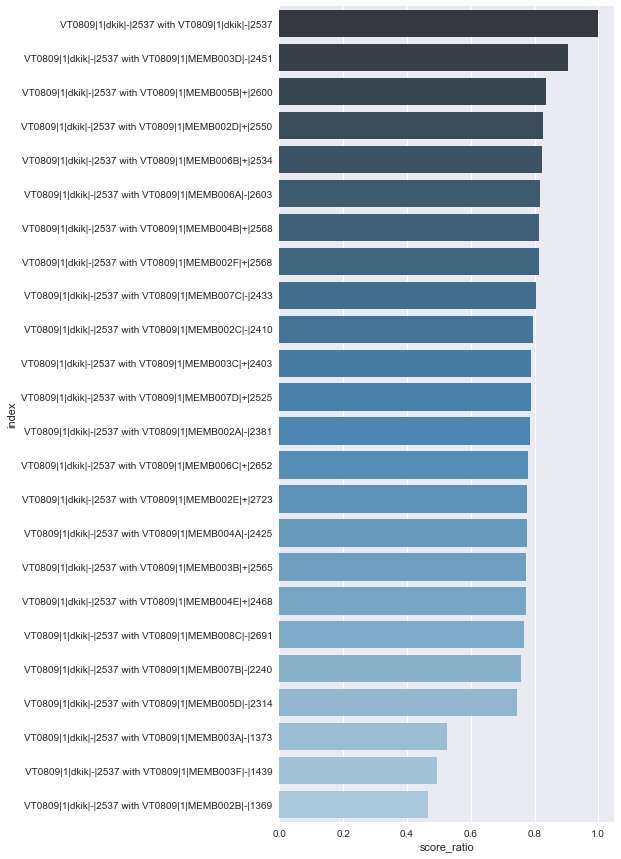

In [320]:
output_1 = plot_scores(tempy)

In [356]:
def save_output(matched_table, bar_plot):
    """
    matched_table: the df with the matched sequences.
    bar_plot: the bar plot created using the score ratios in descending order.
    
    Saves a csv of the pd df and a png of the bar plot into the working directory.
    """
    now = datetime.datetime.now()
    species = re.split(r'\s', matched_table["index"][0])[0]
    file_name = "{}_output_{}".format(species, now.strftime("%d%B%Y"))
    fig = bar_plot.get_figure()
    matched_table.to_csv(file_name + ".csv")
    fig.savefig(file_name + ".png", bbox_inches='tight')

In [357]:
save_output(tempy, output_1)

In [329]:
def match_all_files(files):
    """
    files: the files within the directory.
    
    Runs through the fasta files taking each specimen within a file and comparing it against all others within that 
    file. Runs the matching, renaming, and plotting functions to generate the csv & png file saved to the directory.
    """
    for file in files:
        records = read_file(file)
        sequences = extract(records)
        for i in np.arange(sequences.shape[0]):
            x = chosen_base_sequence(i, sequences)
            temp_names = rename(x, sequences, i)
            temp_score = score_ratio(sequences, temp_names, i)
            output_plot = plot_scores(temp_score)
            save_output(temp_score, output_plot)
            
        

In [328]:
# match_all_files(files)